In [ ]:
# Import pakages
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Scaler
#scalerY   = StandardScaler()
#scalerY.fit(Ytrain)
#Ytrain   = scalerY.transform(Ytrain)
#Ytest    = scalerY.transform(Ytest)
#Yesti    = scalerY.inverse_transform(Yesti)

*******************
Original data
Data shape:  (100, 2)
Mean: [ 7.73517378 -0.47283348]
STD:  [6.9497156  7.04514739]
 


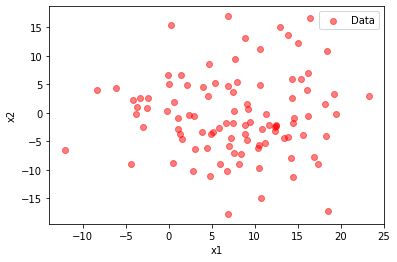

In [ ]:
# Import library to create data
from sklearn import datasets

# Create data
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=1, cluster_std=7)

# Print data information
print("*******************")
print("Original data")
print("Data shape: ",X.shape)
print("Mean:",np.mean(X,axis=0))
print("STD: ",np.std(X,axis=0))
print(" ")

# Scatter plot of the data
plt.scatter(X[:,0], X[:,1], c='r', label='Original data', alpha=0.5)
plt.legend(loc='best')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


*******************
Scaler
Mean: [ 7.73517378 -0.47283348]
STD:  [6.9497156  7.04514739]
 
*******************
Scaled data
Data shape:  (100, 2)
Mean: [-1.88044025e-17 -1.34614542e-17]
STD:  [1. 1.]
 


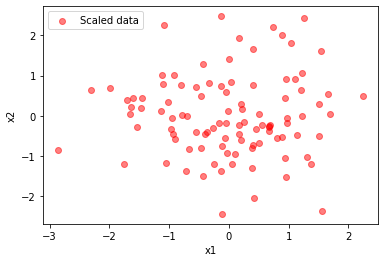

In [ ]:
# Import library for StandardScaler
from sklearn.preprocessing import StandardScaler

# Create StandardScaler object
scaler = StandardScaler()

# Fit the scaler
scaler.fit(X)

# Print scaled data information
print("*******************")
print("Scaler")
print("Mean:",scaler.mean_)
print("STD: ",scaler.scale_)
print(" ")

# Scale the data 
Xscaled = scaler.transform(X)

# Print scaled data information
print("*******************")
print("Scaled data")
print("Data shape: ",Xscaled.shape)
print("Mean:",np.mean(Xscaled,axis=0))
print("STD: ",np.std(Xscaled,axis=0))
print(" ")

# Scatter plot of the scaled data
plt.scatter(Xscaled[:,0], Xscaled[:,1], c='r', label='Scaled data', alpha=0.5)
plt.legend(loc='best')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()



*******************
Inverse data
Data shape:  (100, 2)
Mean: [ 7.73517378 -0.47283348]
STD:  [6.9497156  7.04514739]
 


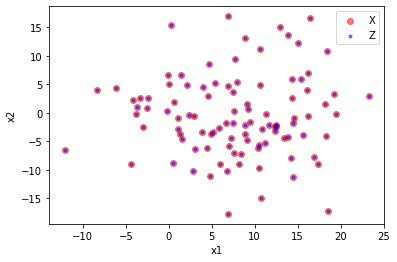

In [ ]:
# Apply inverse transformation
Z = scaler.inverse_transform(Xscaled)

# Print inversedata information
print("*******************")
print("Inverse data")
print("Data shape: ",Z.shape)
print("Mean:",np.mean(Z,axis=0))
print("STD: ",np.std(Z,axis=0))
print(" ")

# Scatter plot of the data
plt.scatter(X[:,0], X[:,1], c='r', label='X', alpha=0.5)
plt.scatter(Z[:,0], Z[:,1], c='b', label='Z', alpha=0.5, marker=".")
plt.legend(loc='best')
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


In [ ]:
import time

tini = time.time()




In [ ]:
tend = time.time() - tini

In [ ]:
print(tend)

0.13620710372924805


(150, 4)
(150, 3)


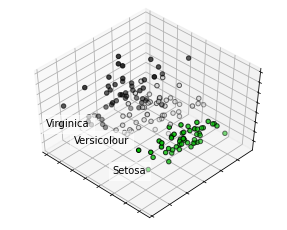

In [ ]:
# Code source: Gaël Varoquaux
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt


from sklearn import decomposition
from sklearn import datasets

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
print(X.shape)
y = iris.target

fig = plt.figure(1, figsize=(4, 3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)
print(X.shape)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()